79. Word Search

Given an m x n grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

 

Example 1:

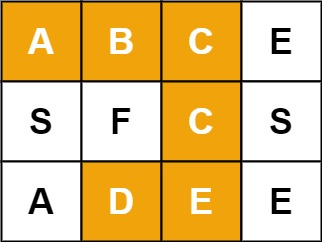

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCCED"
Output: true
Example 2:

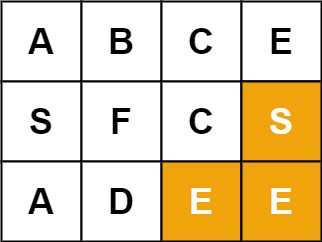

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "SEE"
Output: true
Example 3:

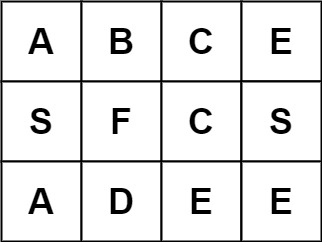

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCB"
Output: false
 

Constraints:

m == board.length
n = board[i].length
1 <= m, n <= 6
1 <= word.length <= 15
board and word consists of only lowercase and uppercase English letters.

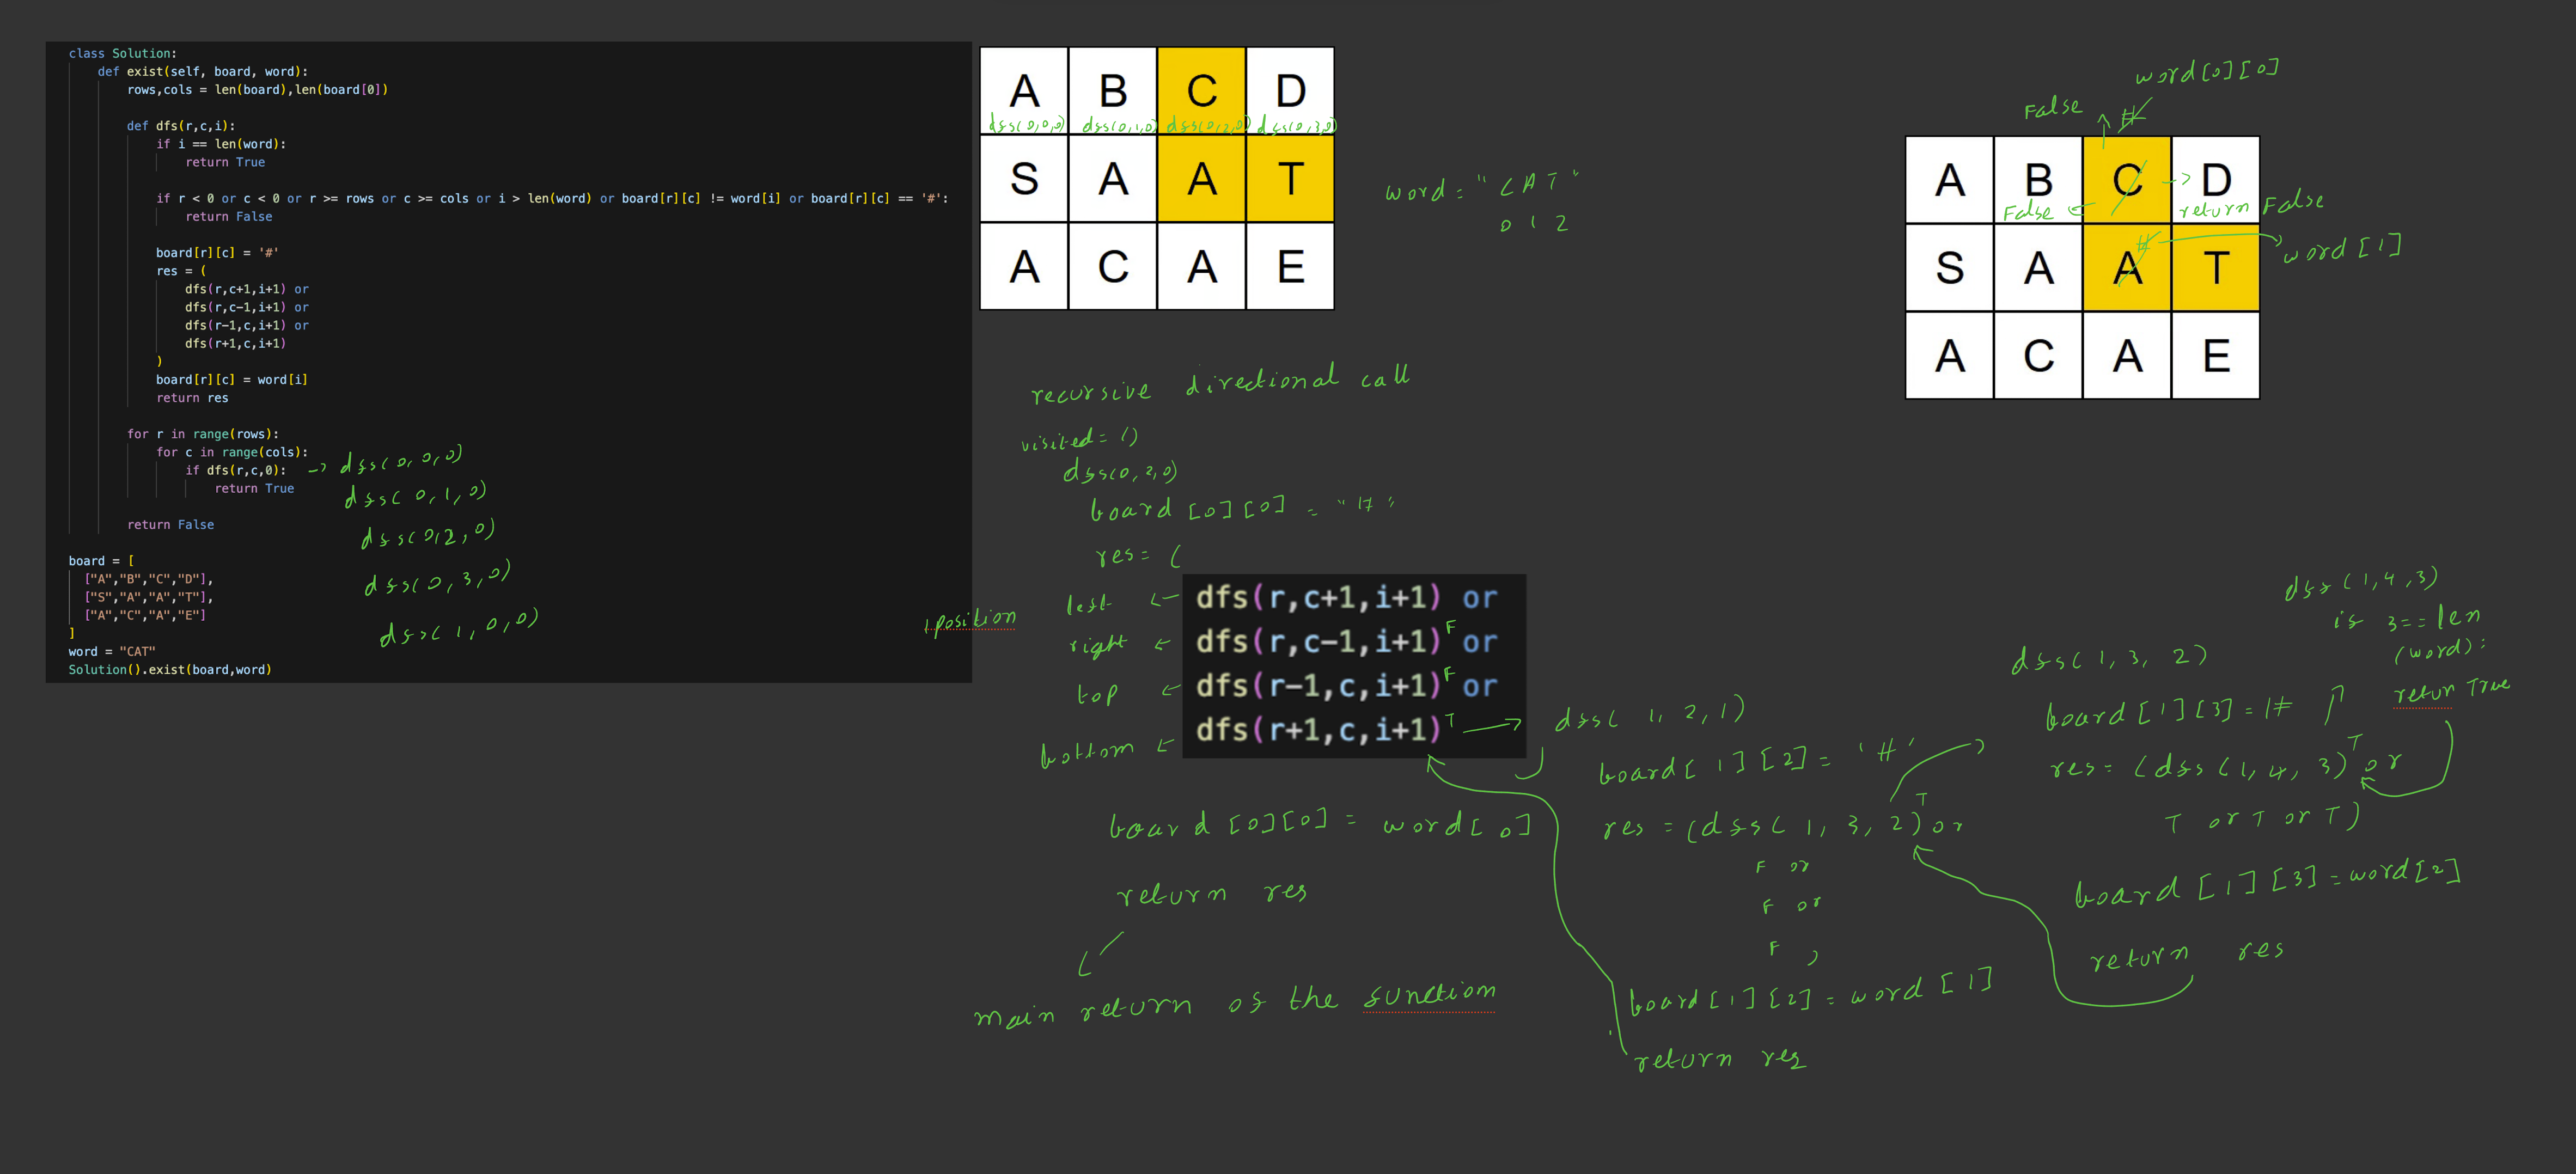

In [ ]:
"""
The intuition here is to perform recursive backtracking in 4 directions, left, right, top and bottom

but we don't want to visit alredy visited letter and letter should match exactly in sequential order as per the given word

before we mark a word for visited and begning the recursive backtracking checks, it should only do so after passing the following condition
these condition prevents from unmatching word or going out of bound and visiting the same word again
            
            # r < 0 or c < 0 check if current index is goin to far left into left or top boundary, r >= rows or c >= cols check if current index is too far out the right or bottom boundary
            # i > len(word)  check if index is going out of word left its self
            #board[r][c] != word[i] if the current index letter dos not match with the current index letter in word
            # if we have already visited a letter we musst have marked with '#', so return False

"""

class Solution:
    def exist(self, board, word):
        rows,cols = len(board),len(board[0])
        
        def dfs(r,c,i):
            #if we have alredy met the word match criteria return True 
            if i == len(word):
                return True
            
            # r < 0 or c < 0 check if current index is goin to far left into left or top boundary, r >= rows or c >= cols check if current index is too far out the right or bottom boundary
            # i > len(word)  check if index is going out of word left its self
            #board[r][c] != word[i] if the current index letter dos not match with the current index letter in word
            # if we have already visited a letter we musst have marked with '#', so return False
            if r < 0 or c < 0 or r >= rows or c >= cols or i > len(word) or board[r][c] != word[i] or board[r][c] == '#': 

                return False

            board[r][c] = '#' #marking as visited, bit better than using a visited set seperately

            #recursive backtracking calls into left, right, top and bottom direction from current index
            res = (
                dfs(r,c+1,i+1) or 
                dfs(r,c-1,i+1) or
                dfs(r-1,c,i+1) or
                dfs(r+1,c,i+1)
            )
            board[r][c] = word[i] #unmarking the word as we back track
            return res

        for r in range(rows):
            for c in range(cols):
                if dfs(r,c,0):
                    return True
        
        return False
    
board = [
  ["A","B","C","D"],
  ["S","A","A","T"],
  ["A","C","A","E"]
]
word = "CAT"
Solution().exist(board,word)

True

In [6]:
class Solution:
    def exist(self, board, word):
        rows,cols = len(board),len(board[0])
        visited = set()
        def dfs(r,c,i):
            if i == len(word):
                return True

            if r < 0 or c < 0 or r >= rows or c >= cols or i > len(word) or board[r][c] != word[i] or (r,c) in visited:
                return False


            visited.add((r,c))
            res = (
                dfs(r,c+1,i+1) or
                dfs(r,c-1,i+1) or
                dfs(r-1,c,i+1) or
                dfs(r+1,c,i+1)
            )
            visited.remove((r,c))
            return res

        for r in range(rows):
            for c in range(cols):
                if dfs(r,c,0):
                    return True
        
        return False
    
board = [
  ["A","B","C","D"],
  ["S","A","A","T"],
  ["A","C","A","E"]
]
word = "BAT"

Solution().exist(board,word)

False